# HOMEWORK I

## Imports and stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%config InlineBackend.figure_format='svg' #for better resolution

#gauss distribution
def carl_friedrich(x,a,mu,sig):
    return a * np.exp(-(x - mu)**2/(2*sig**2))

Setting the parameters for matplotlib backend. Using TeX as backend for text. 

In [2]:
params = {
      'text.latex.preamble': r"\usepackage{mlmodern}",
      'legend.fontsize': 10,
      'axes.labelsize': 10,
      'axes.titlesize': 11,
      'xtick.labelsize' :10,
      'ytick.labelsize' :10,
      'font.family' : 'mlmodern', 
      'text.usetex' : True,
      #'figure.dpi': 600
      }
plt.rcParams.update(params)

## Getting data

Loading provided data and generating datasets based on parameters $\mu$ and $\sigma$ of Gaussian distribution. Which bins are used as parameters for sampled gaussian distribution is given by `selected_bins`. Selected bins and their count can be changed and the code should still work.

In [38]:
data = np.loadtxt("data/data.csv", skiprows=1, delimiter=",") #load dataset
pT = np.array([-100, -80, -60, -40, -20, -10, -5, -3, -1, 1, 3, 4, 5, 6, 7, 8,
 9, 10, 12, 14, 16, 18, 20, 25, 30, 40, 50, 60, 70, 80, 100]) #p transverse, edges of bins

selected_bins = [11,12,13] #bins from dataset to select for example sampled gausian plots and fits
bins = len(selected_bins) #number of selected bins
samples = 100000 #no. of samples taken

#initialize empty lists for proton-proton and nucleus-nucleus yields and their ratios
hpp_samples, hAA_samples, ratios = [],[],[] 

dataSelected = np.take(data, selected_bins, axis=0) #select bins given by indexes from array selected_bins from data

for row in dataSelected:  #iterates over data. Data in format: [index | hpp | hpp_error | hAA | hAA_error] 
    #randomly sample gaussian distribution with parameters given by data
    hAA = np.random.normal(row[3], row[4], samples)
    hpp = np.random.normal(row[1], row[2], samples)

    hpp_samples.append(hpp)
    hAA_samples.append(hAA)
    ratios.append(hAA/hpp)

## Fit

In [39]:
sigmaL, sigmaR, paramsL, paramsR, limits, xrange = [],[],[],[],[],[]

for hist in ratios:
    
    vals, edges = np.histogram(hist,bins=50) #histogram from individual measurement values
    centers = (edges[1:] + edges[:-1]) / 2 #calculation of center of bins
    limit = np.argmax(vals) #index of bin with the maximum value

    limits.append(limit)
    xrange.append(centers)

    popt, _ = curve_fit(carl_friedrich, centers[:limit+1], vals[:limit+1]) #left fit of the histogram using carl
    sigmaL.append(popt[2])
    paramsL.append(popt)
    
    popt, _ = curve_fit(carl_friedrich, centers[limit:], vals[limit:]) #right fit of the histogram using carl
    sigmaR.append(popt[2])
    paramsR.append(popt)

## Example of bootstrap histograms

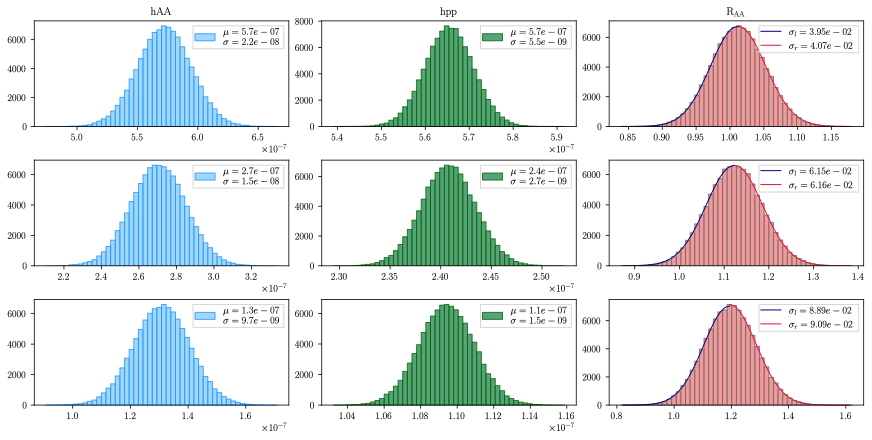

In [40]:
fig, axs = plt.subplots(bins, 3, layout="constrained", figsize=(12, 2*bins))
#fig.subplots_adjust(hspace=0, vspace=0) #graphs without spacing

for (col1, col2, col3), hAA, hpp, ratio, legend, pL, pR, x, limit in zip(axs, hAA_samples, hpp_samples, ratios, dataSelected, paramsL, paramsR, xrange, limits): #iteration through all of the data needed for plotting
    
    col1.hist(hAA, bins = 50, color='lightskyblue', edgecolor='dodgerblue', alpha=.8, label = '$\mu = {:.1e}$ \n $\sigma = {:.1e}$'.format(legend[3],legend[4])) #col1 corresponds to hAA
    col2.hist(hpp, bins = 50, color='seagreen', edgecolor='darkgreen', alpha=.8, label = '$\mu = {:.1e}$ \n $\sigma = {:.1e}$'.format(legend[1],legend[2])) #col2 corresponds to hpp
    col3.hist(ratio, bins = 50, color='lightcoral', edgecolor='dimgrey', alpha=.8) #col3 corresponds to RAA

    col3.plot(x[:limit+1], carl_friedrich(x[:limit+1],*pL),c='navy', lw=1, label = '$\sigma_l = {:.2e}$'.format(np.abs(pL[2]))) #plot of the left fit
    col3.plot(x[limit:], carl_friedrich(x[limit:],*pR), c='crimson', lw=1, label = '$\sigma_r = {:.2e}$'.format(np.abs(pR[2]))) #plot of the right fit   
    
    col1.legend(loc="upper right", fontsize=10, fancybox=False, borderpad=.2)
    col2.legend(loc="upper right", fontsize=10, fancybox=False, borderpad=.2)
    col3.legend(loc="upper right", fontsize=10, fancybox=False, borderpad=.2)
    

axs[0,0].set_title("hAA")
axs[0,1].set_title("hpp")
axs[0,2].set_title('R$_\mathrm{AA}$')

plt.show()

## Histogram $R_\mathrm{AA}$ - $p_\mathrm{T}$

In [6]:
for row in dataSelected:  #iterates over data. Data in format: [index | hpp | hpp_error | hAA | hAA_error] 
    #randomly sample gaussian distribution with parameters given by data
    hAA = np.random.normal(row[3], row[4], samples)
    hpp = np.random.normal(row[1], row[2], samples)

    hpp_samples.append(hpp)
    hAA_samples.append(hAA)
    ratios.append(hAA/hpp)

sigmaL, sigmaR, paramsL, paramsR, limits, xrange = [],[],[],[],[],[]

for hist in ratios:
    
    vals, edges = np.histogram(hist,bins=100) #histogram from individual measurement values
    centers = (edges[1:] + edges[:-1]) / 2 #calculation of center of bins
    limit = np.argmax(vals) #index of bin with the maximum value

    limits.append(limit)
    xrange.append(centers)

    popt, _ = curve_fit(carl_friedrich, centers[:limit+1], vals[:limit+1]) #left fit of the histogram using carl
    sigmaL.append(popt[2])
    paramsL.append(popt)
    
    popt, _ = curve_fit(carl_friedrich, centers[limit:], vals[limit:]) #right fit of the histogram using carl
    sigmaR.append(popt[2])
    paramsR.append(popt)

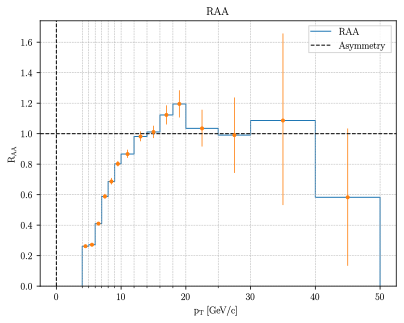

In [96]:
sig_l, sig_r, raa = [],[],[]

for row in data[3:]:    #iterates over data. Data in format: [index | hpp | hpp_error | hAA | hAA_error]  
    
    hAA = np.random.normal(row[3], row[4], samples)
    hpp = np.random.normal(row[1], row[2], samples)
    RAA = hAA/hpp

    vals, edges = np.histogram(RAA,bins=100) 

    centers = (edges[1:] + edges[:-1]) / 2
    limit = np.argmax(vals) #index of bin with the maximum value

    pl, _ = curve_fit(carl_friedrich, centers[:limit+1], vals[:limit+1], maxfev=1000) #left fit of the histogram using carl
    pr, _ = curve_fit(carl_friedrich, centers[limit:], vals[limit:], maxfev=1000) #right fit of the histogram using carl
    #p, _ = curve_fit(carl_friedrich, centers, vals, maxfev=1000) #full fit of the histogram using carl

    sig_l.append(np.abs(pl[2]))
    sig_r.append(np.abs(pr[2]))
    raa.append((pl[1]+pr[1])/2) 

asym_err = [sig_l, sig_r]

plt.stairs(raa, edges=pT[11:27])
centers = (pT[11:27][1:] + pT[11:27][:-1]) / 2
plt.errorbar(centers, raa, yerr=asym_err, fmt='o', linewidth=.8, ms=3)
#plt.xticks(np.arange(0,50,2), minor=True)
plt.xticks(pT[11:27], minor=True)
plt.xlabel("p$_\mathrm{T}$ [GeV/c]")
plt.ylabel("R$_\mathrm{AA}$")
plt.title("RAA")
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.axhline(y=1, color='k', linestyle='--', lw=1)
plt.axvline(x=0, color='k', linestyle='--', lw=1)
plt.legend(['RAA', 'Asymmetry'], loc='upper right', fontsize=10, fancybox=False, borderpad=.2)
plt.show()

In [63]:
len(pT[11:27])

16

array([12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.,
       25., 26.])